<ipython-input-5-b6be31b7bd27>:113: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res = linprog(C_aux,   A_eq=Aeq, b_eq=beq   , bounds=bounds, method='simplex')


 
Lambda optimo= [0.39847813]
~Cost: [[3.1954344  1.39847813 3.1954344  5.39847813 3.1954344  2.1954344
  3.99239066]]
The raw solution will be: [0. 1. 0. 0. 1. 0. 1.]
The arcs that make the shortest path will be (from, to): [(0, 2), (2, 4), (4, 5)]
The the L value is: 5.40 
i= 1001
diff= [0.000999]
NN matriz:
[[0. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 0.]]
NA matriz:
[[ 1  1  1  1  1  1 -1  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0
  -1  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0]
 [-1  0  0  0  0  0  1  1  1  1  1  1  0 -1  0  0  0  0  0 -1  0  0  0  0
   0 -1  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0]
 [ 0 -1  0  0  0  0  0 -1  0  0  0  0  1  1  1  1  1  1  0  0 -1  0  0  0
   0  0 -1  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0]
 [ 0  0 -1  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  1  1  1  1  1  1
   0  0  0 -1  0  0  0  0  0 -1  0  0  0 

<ipython-input-5-b6be31b7bd27>:182: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res = linprog(C,  A_eq=Aeq, b_eq=beq, bounds=bounds,method="simplex")


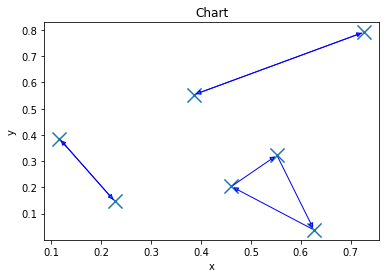

In [5]:
#Ejercicio 12


import pandas as pd

import os

import numpy as np

import scipy.io as sio

from scipy import stats

from math import factorial

import seaborn as sns

from scipy.linalg import eigh,eig,eigvals

from scipy.optimize import linprog

import matplotlib.pyplot as plt

from copy import deepcopy

import sys

from scipy.spatial import distance as dist

import copy

import numpy as np

from scipy.optimize import linprog

from basic_utils import nn2na, get_usage_string, get_min_cut

import numpy as np

from scipy.optimize import linprog

from basic_utils import nn2na, get_usage_string, get_min_cut

import numpy as np

import pandas as pd

# Matrix treatment:
def nn2na(NN):
    # Get every location where exist an arc:
    idxs = np.argwhere(NN)
    # Preallocate NA matrix, dimension is (nodes, arcs)
    NA = np.zeros([NN.shape[0], idxs.shape[0]]).astype(int)
    C = np.zeros(NA.shape[1])
    # Loop in every arc, complete from (1) to (-1)
    for i, arc in enumerate(idxs):
        # Node arc:
        NA[arc[0], i] = 1 # From
        NA[arc[1], i] = -1 # To

    arc_idxs = [(arc[0], arc[1]) for arc in idxs]

    return NA, arc_idxs

# Shortest path Utils
def get_selected_arcs(arc_idxs, selected_arcs):
    arc = []
    for idx, i in enumerate(selected_arcs):
        if np.isclose(i, 1, rtol=1e-05, atol=1e-08, equal_nan=False): # Vecinity
            arc.append(arc_idxs[idx])
    return arc

# Maximum flow Utils
def get_usage_string(arc_idxs, res_flow, capacity):
    return {arc: '%s/%s' % (flow, cap) for arc, flow, cap in zip(arc_idxs, res_flow, capacity)}

def get_min_cut(arc_idxs, np_res_flow, np_capacity):
    np_capacity = np.where(np_capacity == None, 999, np_capacity)

    idxs = np.argwhere((np_res_flow - np_capacity) == 0)
    return [arc_idxs[i[0]] for i in idxs]


# IMPORT THE DATA:
NN = np.array([[0, 1, 1, 0, 0, 0],
               [0, 0, 0, 1, 0, 1],
               [0, 0, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 0]])

# DATA MANIPULATION:

Aeq, arc_idxs = nn2na(NN)
beq = np.array([1, 0, 0, 0, 0, -1])
bounds = tuple([(0, None) for arcs in range(0, Aeq.shape[1])])

# Costos  
C=np.array([[2, 1, 2, 5, 2, 1, 2]])
# Tiempo de cada Arco
C_t=np.array([[3, 1, 3, 1, 3, 3, 5]])
# Restricción de tiempo
T=8

lamb=0
tol=10**-3
diff=1
i=1

while diff > tol:
  C_aux=(C+(C_t*lamb))
    # OPTIMIZE:
  res = linprog(C_aux,   A_eq=Aeq, b_eq=beq   , bounds=bounds, method='simplex')
  L=res.fun -lamb*T
  x=res.x
  x=x.T
  L_grad=np.dot(C_t,x)-T
  stp=1/i
  i+=1                                                                              
  lamb_aux=lamb
  lamb=lamb+(stp*L_grad)
  diff=abs(lamb-lamb_aux)

selarcs = get_selected_arcs(arc_idxs, res.x)
print(' ')
print('Lambda optimo=', lamb_aux)
print('~Cost:',C_aux)
print('The raw solution will be: %s' % res.x)
print('The arcs that make the shortest path will be (from, to): %s' % selarcs)
print('The the L value is: %0.2f ' % L)
print('i=',i-1)
print('diff=',diff)


np.random.seed(10200)

# Generacion de puntos aleatorios
def generator_point(cant_point):
    point=[]
    x=np.random.random(size=cant_point)
    y=np.random.random(size=cant_point)
    for i in range (len(x)):
        point.append((x[i],y[i]))
    return point,x,y

# matriz NN y calculo de distancias (C)
def cost_and_NN(vertex):
    C=[]
    NN=np.zeros([len(vertex),len(vertex)])
   
    for j in range (len(vertex)):
        for i in range (len(vertex)):
            if j!=i:
                C.append(dist.euclidean(vertex[j], vertex[i]))
                NN[i,j]=1
    return NN,C

# Para 7 puntos
num=7
vertex,x,y=generator_point(num)
NN,C=cost_and_NN(vertex)
print('NN matriz:')
print(NN)

NA, arc_idxs = nn2na(NN)
print('NA matriz:')
print(NA)

# Aeq
Aeq_1 = (NA > 0).astype(int)
Aeq_2 = (NA < 0).astype(int)

Aeq = np.concatenate([Aeq_1, Aeq_2], axis=0)

beq = np.ones([1,Aeq.shape[0]])


bounds = tuple([(0, None) for arcs in range(0, Aeq.shape[1])])


   
res = linprog(C,  A_eq=Aeq, b_eq=beq, bounds=bounds,method="simplex")


# GET THE SOLUTION:
selarcs = get_selected_arcs(arc_idxs, res.x)

print('## Results ## \n ')

print('The raw solution will be: %s' % res.x)


print('The arcs that make the shortest path will be (from, to): %s \n ' % selarcs)

print('The minimum cost will be: %0.2f  \n' % res.fun)

plt.scatter(x, y,s=200,marker="x")


arrowprops = dict(arrowstyle='-|>', connectionstyle='arc3', edgecolor='blue')
for i, j in selarcs:
    plt.annotate('', xy=[x[j],y[j]],xytext=[x[i], y[i]],arrowprops=arrowprops)


plt.title('Chart')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

